<center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Práctico 1: Feature engineering</font></h2>

# <center> A la deriva </center>
<center><i>El paisaje es agresivo, y reina en él un silencio de muerte. Al atardecer, sin embargo, su belleza sombría y calma cobra una majestad única.</i></center>

<div style="text-align: center"><i>- A la deriva, Horacio Quiroga.<div>
<br>
<center><img src="https://media.nationalgeographic.org/assets/photos/380/216/1c9ab248-0c9c-413d-b0c8-ce8aec56b821.jpg" width=700></center>

### <b><span style='color:#F1A424'>Tabla de contenidos</span></b> <a class='anchor' id='top'></a>
<b></b>
<div style=" background-color:#3b3745; padding: 13px 13px; border-radius: 8px; color: white">
<li> <a href="#0">Importe las librerías necesarias</a></li>
<li> <a href="#1">Cargue los datasets del práctico</a></li>
<li><a href="#2">Cardinalidad</a></li>
<li><a href="#3">Género</a></li>
<li><a href="#4">Edad</a></li>
<li><a href="#5">Equal-width binning</a></li>
<li><a href="#6">Dolor</a></li>
<li><a href="#7">Ingresos</a></li>
<li><a href="#8">Probabilidad de infarto</a></li>
<li><a href="#9">Altura</a></li>
<li><a href="#10">Peso</a></li>
<li><a href="#11">Visualización 3d: parte 1</a></li>
<li><a href="#12">Visualización 3d: parte 2</a></li>
<li><a href="#13">Preguntas</a></li>
<li><a href="#14">Mean imputation</a></li>
<li><a href="#15">Hot-deck imputation</a></li>
<li><a href="#16">PCA: parte 1</a></li>
<li><a href="#17">PCA: parte 2</a></li>
</div>


Al finalizar el práctico usted aprenderá:
- Chequeo de cardinalidad para la detección de anomalías.
- One-hot encoding.
- Imputación de valores faltantes utilizando datos disponibles.
- Binning.
- Ordinal encoding.
- Detección y remoción de outliers.
- Estandarización.
- Normalización.
- Transformaciones para visualización de valores.
- Visualización 3D.
- Técnicas de imputación de valores faltantes.
- Principal Component Analysis para la reducción de dimensionalidad.

<div class="alert alert-block alert-warning">  
    <b>Nota:</b> Por favor, en las celdas al final usar <code>.head(10)</code>
</div>

# <b>0 <span style='color:#F1A424'>|</span> Importe las librerías necesarias</b><a class='anchor' id='0'></a> [↑](#top)

***

In [19]:
import datetime
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# <b>1 <span style='color:#F1A424'>|</span> Cargue los datasets del práctico</b><a class='anchor' id='1'></a> [↑](#top)

***

In [20]:
experiments_no_missing = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_no_missing.csv')
experiments_with_missing = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_with_missing.csv')
pacientes = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')
pca = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pca.csv')


# <b>2 <span style='color:#F1A424'>|</span> Cardinalidad</b><a class='anchor' id='2'></a> [↑](#top)

***
Averigüe que es la cardinalidad de un conjunto. Chequee la cardinalidad de las columnas que crea necesarias.

In [28]:
def calcular_cardinalidad(df):
    cardinalidades = {}
    for col in df.columns:
        cardinalidades[col] = df[col].nunique()
    return cardinalidades

cardinalidad_pacientes = calcular_cardinalidad(pacientes)

print("\nCardinalidad de 'pacientes':\n", cardinalidad_pacientes)


Cardinalidad de 'pacientes':
 {'id': 1000, 'fecha_nac': 969, 'edad': 736, 'grupo_etario': 4, 'sexo': 8, 'altura': 1000, 'peso': 999, 'dolor': 6, 'condicion': 4, 'ingresos': 1000, 'prob_infarto': 998}


# <b>3 <span style='color:#F1A424'>|</span> Género</b><a class='anchor' id='3'></a> [↑](#top)

***
Explore la columna, realize las transformaciones de datos que considere necesarias y realize un one-hot encoding para k-1 variables.

In [29]:
def explorar_transformar(df):
    print(f"Exploración del dataset: {df.shape}\n")
    print(df.info())
    
    cardinalidades = df.nunique()
    print(f"\nCardinalidades de las columnas:\n{cardinalidades}")
    
    cols_categoricas = df.select_dtypes(include=['object']).columns
    print(f"\nColumnas categóricas identificadas:\n{cols_categoricas}")
    
    df = df.dropna() 
    
    df_encoded = pd.get_dummies(df, columns=cols_categoricas, drop_first=True)
    
    return df_encoded

pacientes_encoded = explorar_transformar(pacientes)

pacientes_encoded.to_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes_encoded.csv', index=False)

Exploración del dataset: (1000, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   object 
 1   fecha_nac     1000 non-null   object 
 2   edad          754 non-null    float64
 3   grupo_etario  754 non-null    object 
 4   sexo          1000 non-null   object 
 5   altura        1000 non-null   float64
 6   peso          999 non-null    float64
 7   dolor         1000 non-null   object 
 8   condicion     1000 non-null   object 
 9   ingresos      1000 non-null   float64
 10  prob_infarto  1000 non-null   float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB
None

Cardinalidades de las columnas:
id              1000
fecha_nac        969
edad             736
grupo_etario       4
sexo               8
altura          1000
peso             999
dolor              6
condicion          4
ingresos        10

# <b>4 <span style='color:#F1A424'>|</span> Edad</b><a class='anchor' id='4'></a> [↑](#top)

***
Explore la columna, argumente en un markdown qué tipo de missing value cree que es. Determine qué columna le puede ayudar a imputar estos valores. Impútelos.

In [27]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

print("Nombres de las columnas en el dataset:\n", df.columns)

edad_columna = 'edad'  

if edad_columna in df.columns:
    print(f"\nValores únicos en la columna '{edad_columna}':\n", df[edad_columna].describe())

    missing_values = df[edad_columna].isnull().sum()
    print(f"\nNúmero de valores faltantes en '{edad_columna}': {missing_values}")

    print(f"\nValores faltantes en la columna '{edad_columna}':\n", df[df[edad_columna].isnull()])

    mean_age = df[edad_columna].mean()
    df[edad_columna].fillna(mean_age, inplace=True)

    missing_values_after = df[edad_columna].isnull().sum()
    print(f"\nNúmero de valores faltantes en '{edad_columna}' después de la imputación: {missing_values_after}")

    df.to_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes_imputado.csv', index=False)
else:
    print(f"La columna '{edad_columna}' no existe en el dataset.")

Nombres de las columnas en el dataset:
 Index(['id', 'fecha_nac', 'edad', 'grupo_etario', 'sexo', 'altura', 'peso',
       'dolor', 'condicion', 'ingresos', 'prob_infarto'],
      dtype='object')

Valores únicos en la columna 'edad':
 count    754.000000
mean      49.760536
std       23.015378
min       10.045175
25%       29.863792
50%       49.665982
75%       69.811773
max       88.446270
Name: edad, dtype: float64

Número de valores faltantes en 'edad': 246

Valores faltantes en la columna 'edad':
                                        id   fecha_nac  edad grupo_etario  \
4    cfe3b63f-5638-4e37-8375-7d179e39d2f0  1932-10-22   NaN          NaN   
8    a4632a10-7da7-422f-95ff-c45b69af1bd8  1932-12-22   NaN          NaN   
10   5bac359b-c409-487e-9396-e9d2668d9719  1933-01-05   NaN          NaN   
14   b0abefeb-54d4-44de-a39c-245512bbb191  1933-04-02   NaN          NaN   
20   3a877a94-baec-4900-b3c4-e1b268781459  1933-05-15   NaN          NaN   
..                                  

# <b>5 <span style='color:#F1A424'>|</span> Equal-width binning</b><a class='anchor' id='5'></a> [↑](#top)

***    
Rellene la columna `bins`, la cual es un equal-width binning de la columna `Edad`. En esta columna, los valores deben adoptar:
- `joven` si la edad pertenece a [0,25)
- `adulto` si la edad pertenece a [25,50)
- `mayor` si la edad pertenece a [50,75)
- `anciano` si la edad pertenece a [75,100)
    
Rellene los valores faltantes usando equal-width binning.

In [32]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

bins = [0, 25, 50, 75, 100]
labels = ['joven', 'adulto', 'mayor', 'anciano']

df['bins'] = pd.cut(df[edad_columna], bins=bins, labels=labels, right=False)

print(df[[edad_columna, 'bins']].head(10))

print("\nRevisión de valores faltantes en 'bins':")
print(df['bins'].isnull().sum())

if df['bins'].isnull().sum() > 0:
    df['bins'] = df['bins'].cat.add_categories(['desconocido'])
    df['bins'].fillna('desconocido', inplace=True)

print("\nRevisión de valores faltantes en 'bins' después de la imputación:")
print(df['bins'].isnull().sum())
print(df[[edad_columna, 'bins']].tail(10))

df.to_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_with_missing_binned.csv', index=False)


        edad     bins
0  88.446270  anciano
1  88.043806  anciano
2  87.983573  anciano
3  87.885010  anciano
4        NaN      NaN
5  87.824778  anciano
6  87.819302  anciano
7  87.767283  anciano
8        NaN      NaN
9  87.671458  anciano

Revisión de valores faltantes en 'bins':
246

Revisión de valores faltantes en 'bins' después de la imputación:
0
          edad         bins
990  11.895962        joven
991  11.882272        joven
992        NaN  desconocido
993  11.594798        joven
994  11.512663        joven
995  11.323751        joven
996  11.208761        joven
997  11.091034        joven
998        NaN  desconocido
999  10.045175        joven


# <b>6 <span style='color:#F1A424'>|</span> Dolor</b><a class='anchor' id='6'></a> [↑](#top)

*** 
La columna `dolor` fue creada mediante una encuesta de Google. El data type de esta columna son strings. Sin embargo, si se quisiesen obtener estadísticas básicas como por ejemplo dolor promedio de los pacientes o desviación estándar del dolor a partir de esta columna esto no sería posible. 
1. Realize el encoding que crea necesario usando:
    - Pandas
    - Scikit-learn
2. Obtenga el dolor promedio y la desviación estándar del dolor.
3. Realize un histograma de los valores.

Primeros registros con codificación de dolor:
       dolor  dolor_encoded
0      mucho            3.0
1      medio            2.0
2      mucho            3.0
3  muchisimo            4.0
4      medio            2.0

Dolor promedio:
2.4959183673469387

Desviación estándar del dolor:
0.9897243626711163


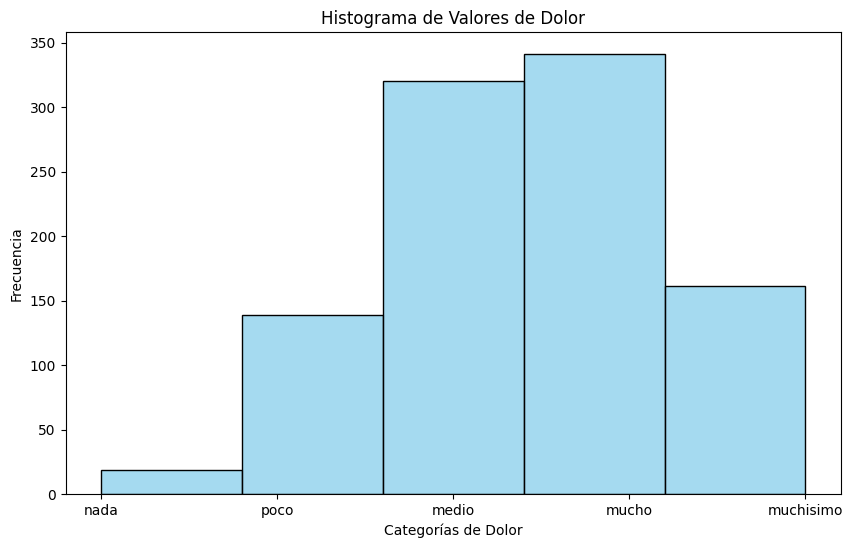

In [34]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

dolor_mapping = {
    'nada': 0,
    'poco': 1,
    'medio': 2,
    'mucho': 3,
    'muchisimo': 4
}

df['dolor_encoded'] = df['dolor'].map(dolor_mapping)

print("Primeros registros con codificación de dolor:")
print(df[['dolor', 'dolor_encoded']].head())

promedio_dolor = df['dolor_encoded'].mean()
desviacion_estandar_dolor = df['dolor_encoded'].std()

print("\nDolor promedio:")
print(promedio_dolor)
print("\nDesviación estándar del dolor:")
print(desviacion_estandar_dolor)

plt.figure(figsize=(10, 6))
sns.histplot(df['dolor_encoded'], bins=len(dolor_mapping), kde=False, color='skyblue')
plt.title('Histograma de Valores de Dolor')
plt.xlabel('Categorías de Dolor')
plt.ylabel('Frecuencia')
plt.xticks(ticks=list(dolor_mapping.values()), labels=list(dolor_mapping.keys()))
plt.show()


# <b>7 <span style='color:#F1A424'>|</span> Ingresos</b><a class='anchor' id='7'></a> [↑](#top)

***

1. Grafique un histograma de la variable ingresos
2. Que distribución sigue?
3. Use [pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) para obtener los datos estadísticos necesarios para remover outliers
4. Grafique la columna mediante un box plot
5. Haga un top-coding para lidiar con los outliers presentes.

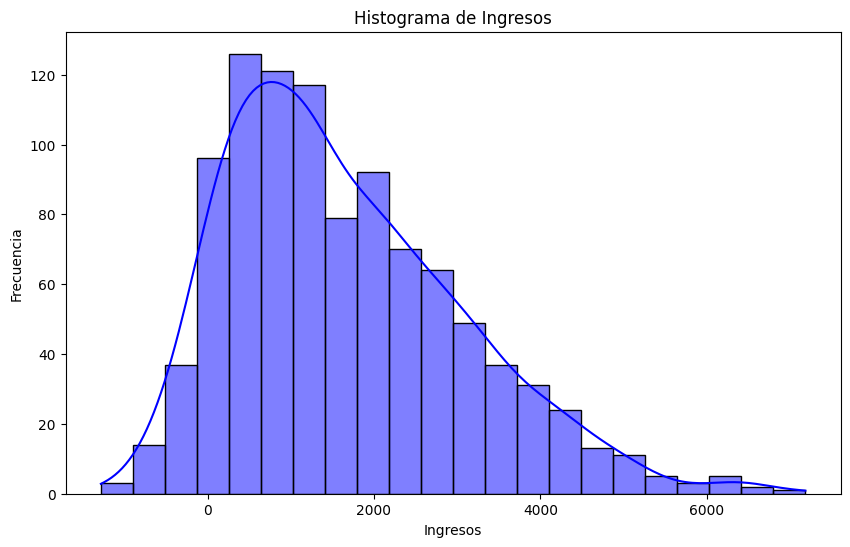

In [36]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

plt.figure(figsize=(10, 6))
sns.histplot(df['ingresos'], kde=True, color='blue')
plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()


# <b>8 <span style='color:#F1A424'>|</span> Probabilidad infarto</b><a class='anchor' id='8'></a> [↑](#top)

***

Los médicos del hospital han determinado que la probabilidad de infarto puede modelarse aproximadamente mediante la función: 

$$ P(infarto) = \frac{edad}{edad +10} $$

1. Grafique la probabilidad de infarto en función de la edad mediante un scatter plot.
2. Los instrumentos médicos pueden tener fallas de manera aleatoria, guardando datos errados esporádicamente. Determine si existen outliers.
3. Busque la manera de lidiar con ellos.

Primeras filas del dataset:
                                     id   fecha_nac       edad grupo_etario  \
0  09f2455f-4416-445b-968e-ada38e20a7fe  1932-03-22  88.446270      anciano   
1  5a7c279a-33be-4221-a6f2-98774d4832ce  1932-08-16  88.043806      anciano   
2  2eb5543f-a384-47a3-b3ad-e6a22b857d04  1932-09-07  87.983573      anciano   
3  d5037cff-78f4-4001-a9d1-3c54d137cd80  1932-10-13  87.885010      anciano   
4  cfe3b63f-5638-4e37-8375-7d179e39d2f0  1932-10-22        NaN          NaN   

  sexo    altura       peso      dolor    condicion     ingresos  prob_infarto  
0    F  1.644960  68.998575      mucho          VIH   680.296944      0.929685  
1    1  1.484714  43.901532      medio  AB_negativo  -460.167478      0.878193  
2    F  1.416192  41.659162      mucho  AB_negativo  2196.809593      0.856153  
3    M  1.721499  74.861796  muchisimo    Hemofilia   659.425176      0.886335  
4    F  1.449872  43.431997      medio     Diabetes   594.440828      0.892957  

Columnas d

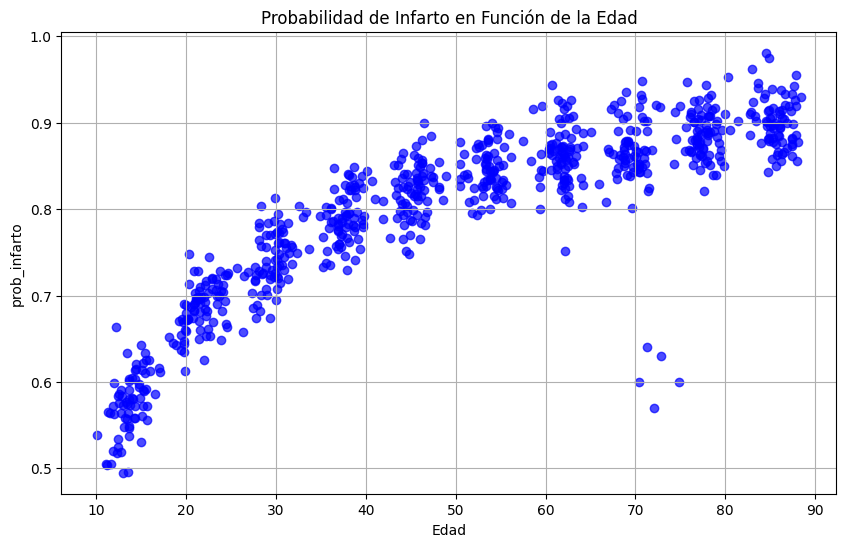

Estadísticas descriptivas de la probabilidad de infarto:
count    1000.000000
mean        0.796039
std         0.104273
min         0.494935
25%         0.734718
50%         0.827026
75%         0.871698
max         0.980997
Name: prob_infarto, dtype: float64


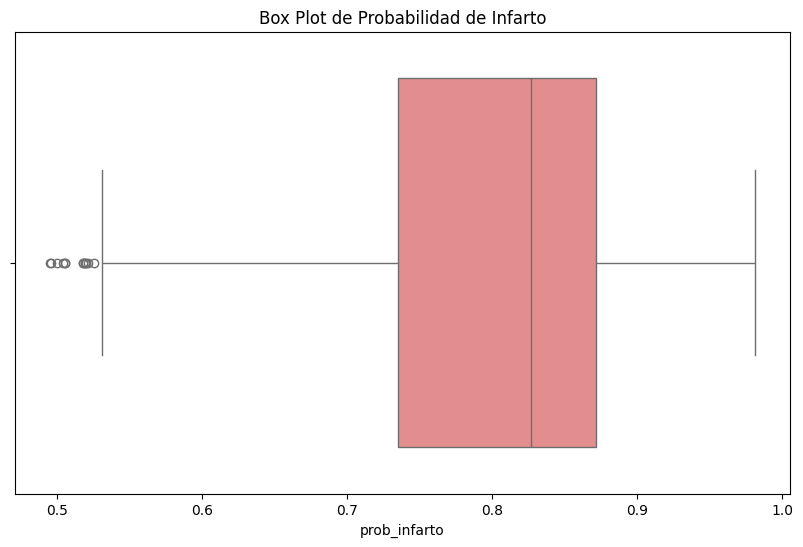

Número de outliers detectados: 3
Primeros registros de outliers:
          edad  probabilidad_infarto
996  11.208761              0.528497
997  11.091034              0.525865
999  10.045175              0.501127
Primeros registros después de eliminar outliers:
        edad  probabilidad_infarto
0  88.446270              0.898422
1  88.043806              0.898005
2  87.983573              0.897942
3  87.885010              0.897839
4        NaN                   NaN


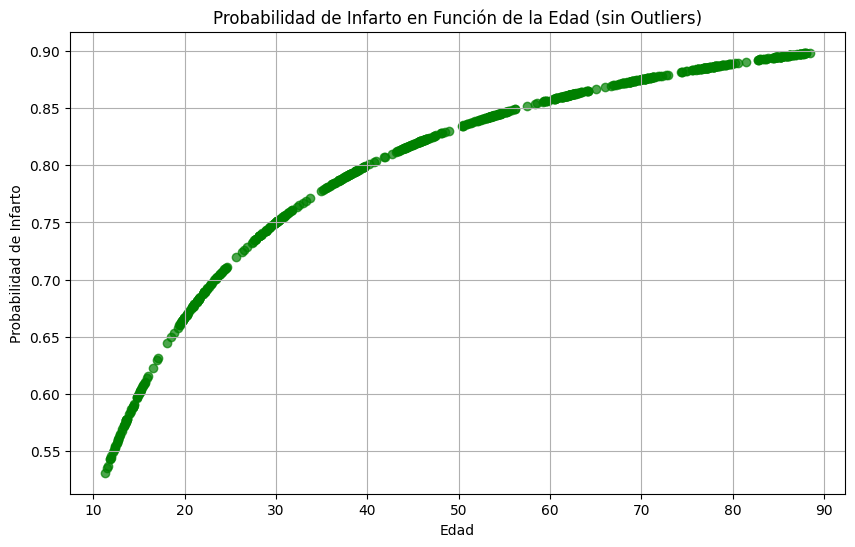

In [41]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

print("Primeras filas del dataset:")
print(df.head())

print("\nColumnas del DataFrame:")
print(df.columns)

edad_columna = 'edad' 

df['probabilidad_infarto'] = df[edad_columna] / (df[edad_columna] + 10)

plt.figure(figsize=(10, 6))
plt.scatter(df[edad_columna], df['prob_infarto'], alpha=0.7, color='blue')
plt.title('Probabilidad de Infarto en Función de la Edad')
plt.xlabel('Edad')
plt.ylabel('prob_infarto')
plt.grid(True)
plt.show()

estadisticas_probabilidad = df['prob_infarto'].describe()
print("Estadísticas descriptivas de la probabilidad de infarto:")
print(estadisticas_probabilidad)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['prob_infarto'], color='lightcoral')
plt.title('Box Plot de Probabilidad de Infarto')
plt.xlabel('prob_infarto')
plt.show()

Q1 = estadisticas_probabilidad['25%']
Q3 = estadisticas_probabilidad['75%']
IQR = Q3 - Q1
outliers = df[(df['probabilidad_infarto'] < (Q1 - 1.5 * IQR)) | (df['probabilidad_infarto'] > (Q3 + 1.5 * IQR))]

print("Número de outliers detectados:", len(outliers))
print("Primeros registros de outliers:")
print(outliers[[edad_columna, 'probabilidad_infarto']].head())

df_cleaned = df[~((df['probabilidad_infarto'] < (Q1 - 1.5 * IQR)) | (df['probabilidad_infarto'] > (Q3 + 1.5 * IQR)))]

print("Primeros registros después de eliminar outliers:")
print(df_cleaned[[edad_columna, 'probabilidad_infarto']].head())

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[edad_columna], df_cleaned['probabilidad_infarto'], alpha=0.7, color='green')
plt.title('Probabilidad de Infarto en Función de la Edad (sin Outliers)')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Infarto')
plt.grid(True)
plt.show()

# <b>9 <span style='color:#F1A424'>|</span> Altura</b><a class='anchor' id='9'></a> [↑](#top)

***


1. Visualize la altura mediante un histograma.
2. Visualize en una sola grafica dos histogramas: uno para el sexo masculino y otro para el sexo femenino.
3. Estandarize los datos.

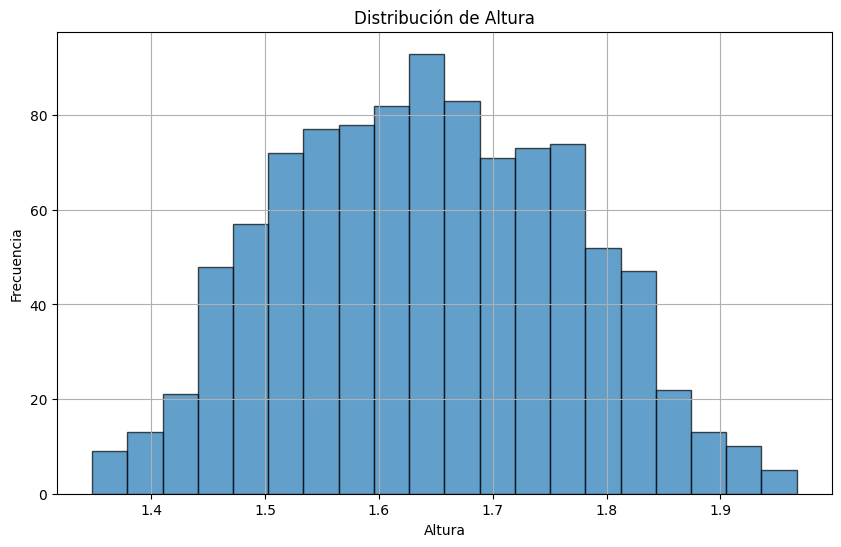

In [42]:
df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['altura'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# <b>10 <span style='color:#F1A424'>|</span> Peso</b><a class='anchor' id='10'></a> [↑](#top)

***
 
Normalize los datos de altura, peso y edad de manera de encontrar la persona más similar al paciente con peso faltante.

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

pacientes_df = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\pacientes.csv')

pacientes_missing_weight = pacientes_df[pacientes_df['peso'].isnull()]

pacientes_no_missing = pacientes_df.dropna(subset=['altura', 'peso', 'edad'])

columnas_a_normalizar = ['altura', 'peso', 'edad']
scaler = MinMaxScaler()
pacientes_no_missing_normalizado = pacientes_no_missing.copy()
pacientes_no_missing_normalizado[columnas_a_normalizar] = scaler.fit_transform(pacientes_no_missing[columnas_a_normalizar])

pacientes_missing_weight_imputado = pacientes_missing_weight.copy()
peso_media = pacientes_no_missing['peso'].mean()
pacientes_missing_weight_imputado['peso'] = pacientes_missing_weight_imputado['peso'].fillna(peso_media)

pacientes_missing_weight_imputado_normalizado = pacientes_missing_weight_imputado.copy()
pacientes_missing_weight_imputado_normalizado[columnas_a_normalizar] = scaler.transform(pacientes_missing_weight_imputado[columnas_a_normalizar])

datos_normalizados = pacientes_no_missing_normalizado[columnas_a_normalizar].values
datos_faltantes_normalizados = pacientes_missing_weight_imputado_normalizado[columnas_a_normalizar].values

distancias = cdist(datos_faltantes_normalizados, datos_normalizados, metric='euclidean')

indices_mas_similares = np.argmin(distancias, axis=1)

for idx, paciente_idx in enumerate(indices_mas_similares):
    paciente_similar = pacientes_no_missing_normalizado.iloc[paciente_idx]
    print(f'Paciente con peso faltante índice {pacientes_missing_weight_imputado.index[idx]}')
    print(f'Paciente más similar:\n{paciente_similar}\n')


Paciente con peso faltante índice 568
Paciente más similar:
id              09f2455f-4416-445b-968e-ada38e20a7fe
fecha_nac                                 1932-03-22
edad                                             1.0
grupo_etario                                 anciano
sexo                                               F
altura                                      0.475291
peso                                        0.516944
dolor                                          mucho
condicion                                        VIH
ingresos                                  680.296944
prob_infarto                                0.929685
Name: 0, dtype: object



### <b><span style='color:#F1A424'>Experimentos</span></b> <a class='anchor' id='top'></a>

Los pacientes han sido sometidos a tres experimentos. Luego de ser obtenidos los resultados de los experimentos, los pacientes han sido catalogados mediante una 'label' que determina la enfermedad que padecen. Sin embargo, la enfermera a cargo ha extraviado los resultados del experimento 3 para muchos pacientes.  

# <b>11 <span style='color:#F1A424'>|</span> Visualización 3D: parte 1</b><a class='anchor' id='11'></a> [↑](#top)

***
    
Visualize los datos de los 3 experimentos para los pacientes sin datos faltantes.  

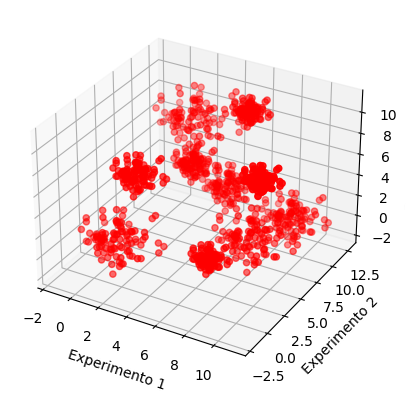

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_no_missing.csv'
exp_not_missing = pd.read_csv(file_path)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = exp_not_missing['exp_1']
y = exp_not_missing['exp_2']
z = exp_not_missing['exp_3']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Experimento 1')
ax.set_ylabel('Experimento 2')
ax.set_zlabel('Experimento 3')

plt.show()

# <b>12 <span style='color:#F1A424'>|</span> Visualización 3D: parte 2</b><a class='anchor' id='12'></a> [↑](#top)

***
    
Hemos visto en clase, en feature transformation, que existen funciones que nos permiten mapear o transformar valores mediante una transformada o función. Investigue distintos colormaps de la librearía matplotlib y como pueden ayudarlo a transformar la variable 'label' (la cual es una variable discreta, un solo número) en una variable de color (una tupla de tres valores numéricos). Los colores de cualquier pantalla son producidos por la superposición de tres colores: RGB (red, green, blue) con distintas intensidades. 

Visualize los datos de los 3 experimentos para los pacientes sin datos faltantes pero que el color de los puntos sea la catagoría (label) a la cual pertenecen. 

Nombres de las columnas: Index(['Unnamed: 0', 'exp_1', 'exp_2', 'exp_3', 'labels'], dtype='object')


C:\Users\Felipe Biatturi\AppData\Local\Temp\ipykernel_26068\924100747.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = cm.get_cmap('tab10', len(label_categories))


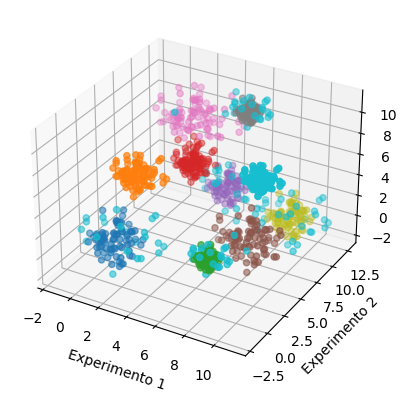

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exp_not_missing = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_no_missing.csv')

print("Nombres de las columnas:", exp_not_missing.columns)

labels = exp_not_missing['labels'].astype('category')
label_categories = labels.cat.categories
label_colors = cm.get_cmap('tab10', len(label_categories))

label_color_map = {category: label_colors(i) for i, category in enumerate(label_categories)}
exp_not_missing['color'] = exp_not_missing['labels'].map(label_color_map)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = exp_not_missing['exp_1']
y = exp_not_missing['exp_2']
z = exp_not_missing['exp_3']
colors = exp_not_missing['color']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Experimento 1')
ax.set_ylabel('Experimento 2')
ax.set_zlabel('Experimento 3')

plt.show()

# <b>13 <span style='color:#F1A424'>|</span> Preguntas</b><a class='anchor' id='13'></a> [↑](#top)

***
    
Conteste a continuación las siguientes preguntas:
1. Tiene sentido normalizar los valores en este escenario? Si o No, justifique su respuesta.
2. Tiene sentido usar una regresión lineal para imputar valores en este escenario? Si o No, justifique su respuesta.

Nombres de las columnas: Index(['Unnamed: 0', 'exp_1', 'exp_2', 'exp_3', 'labels'], dtype='object')


C:\Users\Felipe Biatturi\AppData\Local\Temp\ipykernel_26068\924100747.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = cm.get_cmap('tab10', len(label_categories))


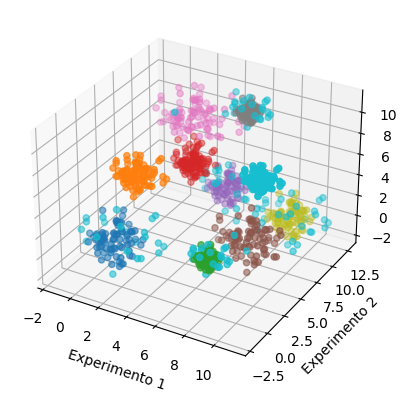

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exp_not_missing = pd.read_csv(r'C:\Users\Felipe Biatturi\Desktop\Ciencia de datos\Practicos\p1\data\experiments_no_missing.csv')

print("Nombres de las columnas:", exp_not_missing.columns)

labels = exp_not_missing['labels'].astype('category')
label_categories = labels.cat.categories
label_colors = cm.get_cmap('tab10', len(label_categories))

label_color_map = {category: label_colors(i) for i, category in enumerate(label_categories)}
exp_not_missing['color'] = exp_not_missing['labels'].map(label_color_map)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = exp_not_missing['exp_1']
y = exp_not_missing['exp_2']
z = exp_not_missing['exp_3']
colors = exp_not_missing['color']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Experimento 1')
ax.set_ylabel('Experimento 2')
ax.set_zlabel('Experimento 3')

plt.show()

# <b>14 <span style='color:#F1A424'>|</span> Mean imputation</b><a class='anchor' id='14'></a> [↑](#top)

***
    
Asígnele a los valores faltantes la media de los valores:
1. Primero, utilizando la media global. Visualize en este caso los datos mediante una gráfica 3D. Qué conclusiones saca a partir de la gráfica?
2. Agrupando por label y asignandole la media del label al que pertenece. Visualize en este caso los datos mediante una gráfica 3D. Qué conclusiones saca a partir de la gráfica?

# <b>15 <span style='color:#F1A424'>|</span> Hot-deck imputation</b><a class='anchor' id='15'></a> [↑](#top)

***
    
Implemente el algoritmo "hot-deck imputation", el cual busca el registro más similar al registro con el valor faltante y le asigna su valor. Visualize en este caso los datos mediante una gráfica 3D.

### <b><span style='color:#F1A424'>Análisis de componentes principales</span></b> <a class='anchor' id='top'></a>
    
Cargue el CSV 'covid' que contiene 12 resultados de distintos análisis para determinar si el paciente tiene COVID-19 o no. Es frecuente, que para predecir una variable realizemos numerosos experimentos y guardemos otros datos adicionales. Como ya hemos visto, todo modelo predictivo busca una manera de expresar la variable a predecir por medio de una función de las variables de entrada. 

Estas variables de entrada en ciertos casos pueden no ser buenas para predecir la variable, introduciendo ruido. En otros casos, las variables están fuertemente correlacionadas entre sí introduciendo información redundante. 

PCA nos permite "descubrir" nuevas variables a partir de nuestras variables de entrada, las cuales estan linealmente no correlacionadas. En consecuencia, podremos predecir la variable objetivo mediante un nuevo conjunto menor de variables que son no redundantes sin perder significativamente información.

# <b>16 <span style='color:#F1A424'>|</span> PCA: parte 1</b><a class='anchor' id='16'></a> [↑](#top)

***

1. Grafique, utilizando la gráfica [seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html), el dataset de COVID (al ser 169 graficas en una esto puede tardar unos minutos).
2. Obtenga la matriz de correlación para el dataset.
3. En una celda aparte conteste las siguientes preguntas:
    - Qué es la correlación entre dos variables? 
    - Por qué es importante la correlación entre las variables de entrada y la variable objetivo?
    - Explique correlación positiva, negativa y neutra. Identifique ejemplos en el dataset

# <b>17 <span style='color:#F1A424'>|</span> PCA: parte 2</b><a class='anchor' id='17'></a> [↑](#top)

***

1. Aplique PCA de tal manera que la varianza explicada sea del 89%
2. Cree un pandas dataframe que contenga las nuevas componentes principales y la variable objetivo.
3. Grafique las dos componentes principales e interprete la gráfica obtenida.